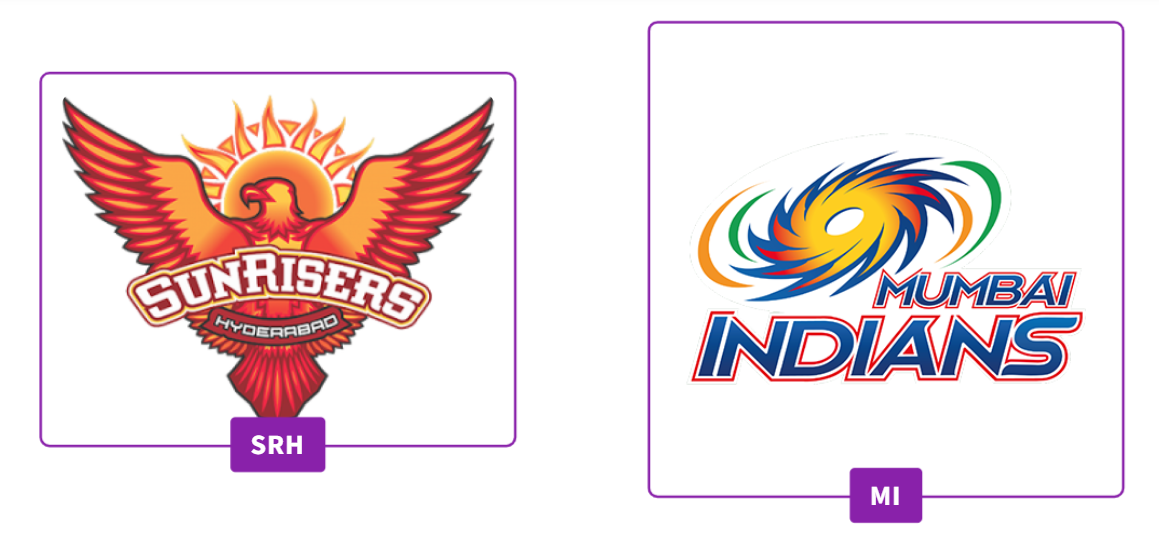

In [1]:
#!pip install bqplot
#!pip install ipywidgets
#!pip install ipympl
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager
#!jupyter nbextension install --user --py widgetsnbextension
#!jupyter nbextension enable --user --py widgetsnbextension
#!pip install plotly
#!pip install cufflinks


import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import ipywidgets as widgets
import plotly.express as px
import plotly.graph_objects as go
import bqplot
from bqplot import Pie
from collections import Counter
from bqplot import DateScale, LinearScale, Lines, Axis, Figure
from bqplot import Tooltip
import cufflinks as cf
from matplotlib.patches import ConnectionPatch
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
pd.set_option('display.max_columns', 50)
%matplotlib widget


In [2]:
matches = pd.read_csv("matches.csv")
deliveries =  pd.read_csv("deliveries.csv")
IPL_data = pd.merge(deliveries, matches[['id','season', 'team1', 'team2', 'toss_winner', 'toss_decision','winner','result', 'dl_applied','win_by_runs','win_by_wickets', 'venue' ]], 
                    left_on='match_id', right_on='id')

In [4]:
#MI batsmen
MI_batsmen = ['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan Kishan', 'HH Pandya', 'KH Pandya','KA Pollard']
#MI bowlers
MI_bowlers = ['JJ Bumrah', 'TA Boult', 'RD Chahar', 'KH Pandya', 'KA Pollard']
#J Pattinson data not available

DC_batsmen  = ['P Shaw', 'S Dhawan', 'AM Rahane', 'SS Iyer', 'MP Stoinis', 'RR Pant', 'AR Patel']
DC_bowlers = ['K Rabada', 'AR Patel', 'R Ashwin', 'MP Stoinis', 'HV Patel']
# No data for Nortje, T Deshpande
# powerplay bowling sequence : Rabada(2 overs) - Nortje(2) - - A Patel(1)
# Death overs: Rabada, Nortje, Deshpande


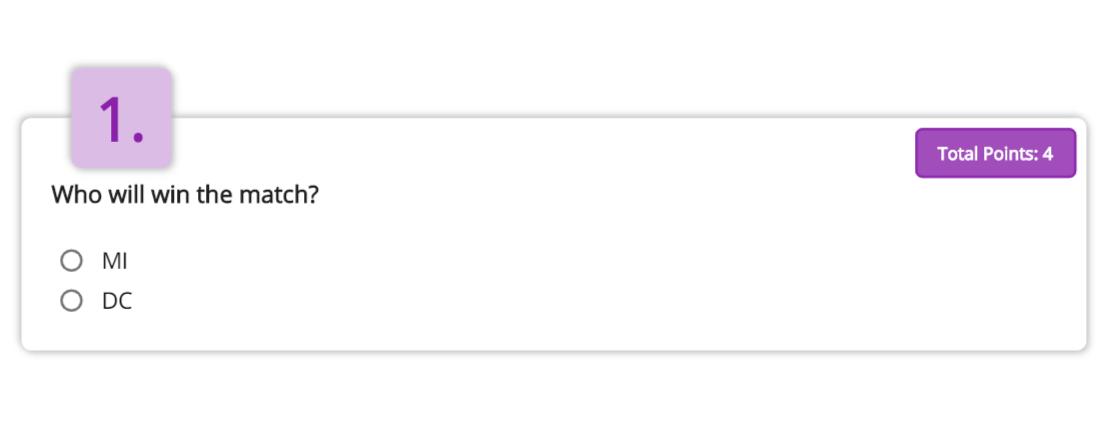

In [68]:

bowling_avg = deliveries[(deliveries.bowler.isin(DC_bowlers)) | (deliveries.bowler.isin(MI_bowlers))]
bowling_avg.player_dismissed.fillna(0, inplace  = True)
bowling_avg['player_dismissed'].loc[bowling_avg['player_dismissed'] != 0] = 1

b_avg1 = bowling_avg.groupby(['bowler'])['player_dismissed'].sum().reset_index(name  = "wickets")
t_b =  bowling_avg.groupby(['bowler'])['batsman_runs'].count().reset_index(name  = "balls_bowled")
b_avg1["balls_bowled"] = t_b.balls_bowled
b_avg1["bowling_avg"] = b_avg1.wickets/b_avg1.balls_bowled


display_side_by_side([b_avg1[b_avg1.bowler.isin(DC_bowlers)], b_avg1[b_avg1.bowler.isin(MI_bowlers)]], 
                     [" 1) bowling average of DC bowlers", " 2) bowling average of MI bowlers"])


## Batting averages of all the batsmen

batsmen_runs_all =deliveries[(deliveries.batsman.isin(DC_batsmen)) | (deliveries.batsman.isin(MI_batsmen))]
b1_all = batsmen_runs_all.groupby(['batsman'])['batsman_runs'].sum().reset_index(name = "total_runs")
b = [];b_avg = [];tm = [];runs  = []
for i in batsmen_runs_all.batsman.unique():
    x = batsmen_runs_all[batsmen_runs_all.batsman == i]
    x.player_dismissed.fillna(0, inplace = True)
    x['player_dismissed'].loc[x['player_dismissed'] != 0] = 1
    #print(x[['match_id','player_dismissed']])
    y = x.groupby(['match_id'])['player_dismissed'].sum().reset_index(name = "out_count")
    z = x.groupby(['match_id'])['batsman_runs'].sum().reset_index(name = "runs")
    #print(y)
    b.append(i)
    b_avg.append(y.out_count.sum())
    runs.append(z.runs.sum())
    tm.append(y.shape[0])
    
bat_avg = pd.DataFrame(list(zip(b, b_avg, tm, runs)), 
               columns =['batsman','matches_out','matches', 'total_runs'])    

bat_avg["batting_average"] = bat_avg.total_runs/bat_avg.matches_out

display_side_by_side([bat_avg[bat_avg.batsman.isin(DC_batsmen)], bat_avg[bat_avg.batsman.isin(MI_batsmen)]],
                     [" 1) batting average of DC batsmen", " 2) batting average of MI batsmen"])

,bowler,wickets,balls_bowled,bowling_avg
0,AR Patel,76,1745,0.043553
1,HV Patel,47,868,0.054147
3,K Rabada,36,434,0.082949
6,MP Stoinis,16,378,0.042328
7,R Ashwin,138,3016,0.045756
,bowler,wickets,balls_bowled,bowling_avg
2,JJ Bumrah,91,1798,0.050612
4,KA Pollard,67,1276,0.052508
5,KH Pandya,42,968,0.043388
8,RD Chahar,15,333,0.045045


,batsman,matches_out,matches,total_runs,batting_average
0,S Dhawan,137,158,4632,33.810219
5,AM Rahane,117,132,3850,32.905983
6,AR Patel,43,62,806,18.744186
7,RR Pant,49,54,1792,36.571429
9,MP Stoinis,15,25,482,32.133333
10,SS Iyer,57,61,1714,30.070175
13,P Shaw,24,25,616,25.666667
,batsman,matches_out,matches,total_runs,batting_average
1,RG Sharma,162,182,4914,30.333333
2,KH Pandya,32,46,915,28.593750


In [70]:
#plots
import numpy as np
import cufflinks as cf

def MI_DC_plot(data, xvalue, key, label):
    cf.set_config_file(theme='polar',sharing='public',offline=True)
    data.iplot(kind="bar",x = xvalue,
                  subplots=False,
                  sortbars=True,
                  keys = [key],
                  title=label,
                  theme="polar"
                  )
MI_DC_plot(bat_avg, "batsman", "batting_average", "Batting averages of DC and MI")
MI_DC_plot(b_avg1,"bowler", "bowling_avg", "Bowling averages of DC and MI")


## MI  will win today

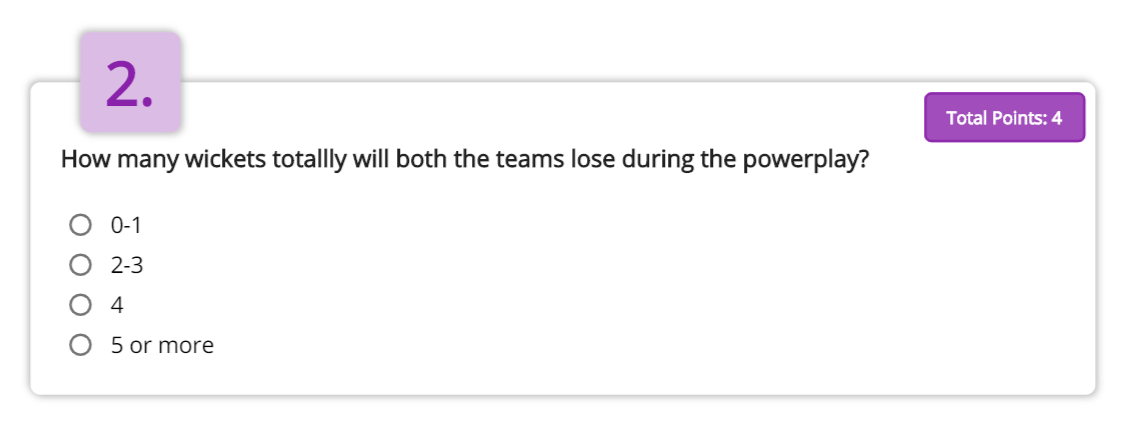

In [5]:
def wickets_taken(wickets_data_matchwise, match_data):
    for i in wickets_data_matchwise.bowler.unique():
        bowler.append(i)
        wi.append(round(wickets_data_matchwise[wickets_data_matchwise.bowler ==i].wickets.mean(),1))
        more_wickets.append(len(wickets_data_matchwise[wickets_data_matchwise.bowler ==i][wickets_data_matchwise.wickets >1].match_id.unique()))
        wicket_matches.append(len(wickets_data_matchwise[wickets_data_matchwise.bowler ==i].match_id.unique()))
        
        t_matches.append(len(match_data[match_data.bowler == i].match_id.unique()))
        
    wickets_data = pd.DataFrame(list(zip(bowler, wi, t_matches, wicket_matches, more_wickets)), 
               columns =['bowler','wickets','matches', 'wicket_matches', "> 1 wicket"])
    wickets_data["wickets %"] = (wickets_data.wicket_matches/wickets_data.matches)*100
    wickets_data["more than 1 wickets %"]= (wickets_data["> 1 wicket"]/wickets_data.wicket_matches)*100

    return wickets_data

### Wickets taken by both the team's bowlers in Powerplay

In [6]:
wickets = deliveries[((deliveries.bowler.isin(DC_bowlers)) | (deliveries.bowler.isin(MI_bowlers))) & 
                    (deliveries.over <=6)]
wickets.player_dismissed.fillna(0, inplace = True)
wickets_DC_MI = wickets[(wickets.player_dismissed != 0) & (wickets.dismissal_kind != 'run out')].groupby(['match_id','bowler'])['player_dismissed'].count().reset_index(name = "wickets")

bowler=[];wi=[];wicket_matches=[];t_matches=[];more_wickets=[]
wickets_data_DC_MI = wickets_taken(wickets_DC_MI, wickets)
import numpy as np
import cufflinks as cf
cf.set_config_file(theme='pearl',sharing='public',offline=True)
wickets_data_DC_MI.iplot(kind="bar",x = "bowler",
                  subplots=False,
                  sortbars=True,
                  keys = ["wickets","matches", "wicket_matches", "> 1 wicket", "wickets %", "more than 1 wickets %"],
                  title="Wickets stats for Dc and MI bowlers in poweplay",
                  theme="henanigans"
                  )


wickets_data_DC_MI

,bowler,wickets,matches,wicket_matches,> 1 wicket,wickets %,more than 1 wickets %
0,KH Pandya,1.2,24,6,1,25.000000,16.666667
1,AR Patel,1.0,40,5,0,12.500000,0.000000
2,MP Stoinis,1.0,8,2,0,25.000000,0.000000
3,JJ Bumrah,1.2,73,11,2,15.068493,18.181818
4,K Rabada,1.0,18,6,0,33.333333,0.000000
5,TA Boult,1.1,33,8,1,24.242424,12.500000
6,R Ashwin,1.3,81,27,7,33.333333,25.925926
7,KA Pollard,1.0,6,1,0,16.666667,0.000000
8,HV Patel,1.1,33,8,1,24.242424,12.500000
9,RD Chahar,1.0,6,3,0,50.000000,0.000000


### Head to Head records

In [9]:
wickets_faceoff = deliveries[(((deliveries.bowler.isin(DC_bowlers)) & (deliveries.batsman.isin(MI_batsmen))) | 
                             ((deliveries.bowler.isin(MI_bowlers)) & (deliveries.batsman.isin(DC_batsmen)))) &
                            (deliveries.over <=6)]
wickets_faceoff.player_dismissed.fillna(0, inplace = True)
wickets_DC_MI_faceoff = wickets_faceoff[(wickets_faceoff.player_dismissed != 0) & (wickets_faceoff.dismissal_kind != 'run out')].groupby(['match_id','bowler'])['player_dismissed'].count().reset_index(name = "wickets")

bowler=[];wi=[];wicket_matches=[];t_matches=[];more_wickets=[]
wickets_data_DC_MI_faceoff = wickets_taken(wickets_DC_MI_faceoff, wickets_faceoff)
import numpy as np
import cufflinks as cf

cf.set_config_file(theme='pearl',sharing='public',offline=True)
wickets_data_DC_MI_faceoff.iplot(kind="bar",x = "bowler",
                  subplots=False,
                  sortbars=True,
                  keys = ["wickets","matches", "wicket_matches", "> 1 wicket", "wickets %", "more than 1 wickets %"],
                  title="Wickets stats for DC and MI bowlers head to head records",
                  theme="henanigans"
                  )

wickets_data_DC_MI_faceoff



,bowler,wickets,matches,wicket_matches,> 1 wicket,wickets %,more than 1 wickets %
0,JJ Bumrah,1.0,20,2,0,10.000000,0.0
1,RD Chahar,1.0,3,1,0,33.333333,0.0


# Conclusion : 2-3

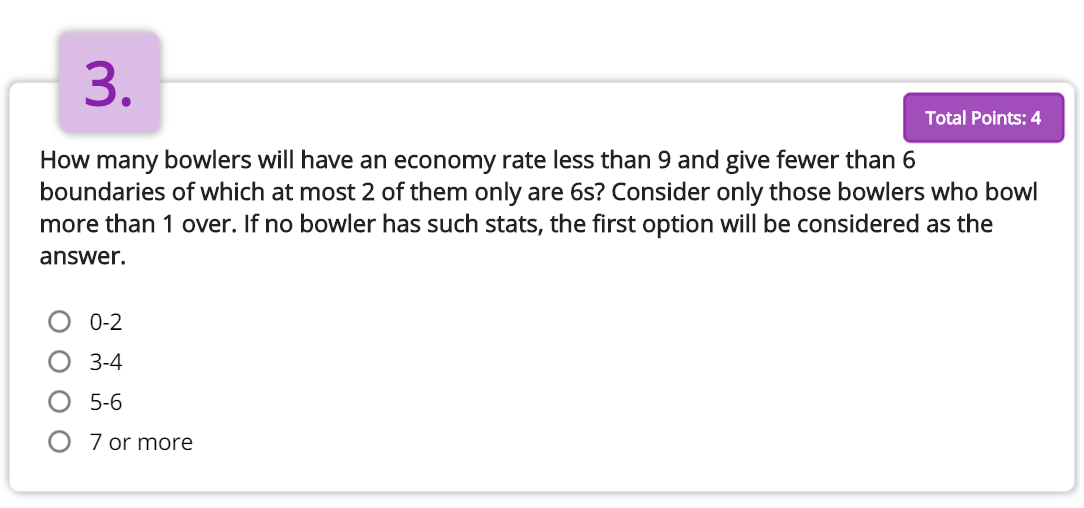

In [25]:
# Overall performnace in IPL
def bowler_stats(total_score, batsmen_runs):
    boundaries_given = batsmen_runs.groupby(['bowler'])['batsman_runs'].count().reset_index(name = "no_offboundaries")
    no_6s = batsmen_runs[batsmen_runs.batsman_runs == 6].groupby(['bowler'])['batsman_runs'].count().reset_index(name = "no_of_6s")
    bowlers_stats = total_score.groupby(['bowler'])['batsman_runs'].count().reset_index(name = "balls_bowled")
    runs_given = total_score.groupby(['bowler'])['batsman_runs'].sum().reset_index(name = "runs_conceeded")
    
    bowlers_stats["runs_conceeded"] = runs_given.runs_conceeded
    bowlers_stats["economy_rate"] = round(((bowlers_stats.runs_conceeded/bowlers_stats.balls_bowled)*6),1)
    bowlers_stats["no_offboundaries"] = boundaries_given.no_offboundaries
    bowlers_stats.no_offboundaries.fillna(0, inplace =True)
    bowlers_stats["no_of_6s"] = no_6s.no_of_6s
    return bowlers_stats
###############################################################################################################################
# Matchwise average
def matchwise_bowler_stats(m_total_score, m_batsmen_runs):
        
    matchwise_boundaries_given = m_batsmen_runs.groupby(['match_id','bowler'])['batsman_runs'].count().reset_index(name = "no_offboundaries")
    matchwise_no_6s = m_batsmen_runs[m_batsmen_runs.batsman_runs == 6].groupby(['match_id','bowler'])['batsman_runs'].count().reset_index(name = "no_of_6s")
    matchwise_bowlers_stats = m_total_score.groupby(['match_id','bowler'])['batsman_runs'].count().reset_index(name = "balls_bowled")
    matchwise_runs_given = m_total_score.groupby(['match_id','bowler'])['batsman_runs'].sum().reset_index(name = "runs_conceeded")
   
    
    matchwise_bowlers_stats["runs_conceeded"] = matchwise_runs_given.runs_conceeded
    matchwise_bowlers_stats["economy_rate"] = round(((matchwise_bowlers_stats.runs_conceeded/matchwise_bowlers_stats.balls_bowled)*6),1)
    matchwise_bowlers_stats["no_offboundaries"] = matchwise_boundaries_given.no_offboundaries
    matchwise_bowlers_stats.no_offboundaries.fillna(0, inplace =True)
    matchwise_bowlers_stats["no_of_6s"] = matchwise_no_6s.no_of_6s
    

    bowls = [];of_boundaries =[];b_bowled = [];runs_conceed=[];n_6s=[] 
    
    for i in matchwise_bowlers_stats.bowler.unique():
        bowler_boundaries_data = matchwise_bowlers_stats[matchwise_bowlers_stats.bowler == i]
        bowls.append(i)
        of_boundaries.append(bowler_boundaries_data.no_offboundaries.mean())
        b_bowled.append(bowler_boundaries_data.balls_bowled.mean())
        runs_conceed.append(bowler_boundaries_data.runs_conceeded.mean())
        n_6s.append(bowler_boundaries_data.no_of_6s.mean())
        
    bowler_stats_avg =  pd.DataFrame(list(zip(bowls,  b_bowled,  runs_conceed, of_boundaries, n_6s)), 
               columns =['bowler',  'balls_bowled', 'runs_conceeded', 'no_offboundaries', 'no_of_6s'])
    bowler_stats_avg["economy_rate"] = round(((bowler_stats_avg.runs_conceeded/bowler_stats_avg.balls_bowled)*6),1)
    
    return bowler_stats_avg

################################################################################################################################


In [30]:
DC_MI_bowlers  = deliveries[(deliveries.bowler.isin(DC_bowlers)) | (deliveries.bowler.isin(MI_bowlers))]
boundaries_hit = DC_MI_bowlers[((DC_MI_bowlers.batsman_runs == 4) & (DC_MI_bowlers.extra_runs != 4)) | 
                          ((DC_MI_bowlers.batsman_runs == 6) & (DC_MI_bowlers.extra_runs != 6))]



# overall records head to head in IPL
DC_MI_bowler_stats = bowler_stats(DC_MI_bowlers, boundaries_hit)
#DC_MI_bowler_stats

# matchwise records 
DC_MI_BS_avg = matchwise_bowler_stats(DC_MI_bowlers, boundaries_hit)
#DC_MI_BS_avg

display_side_by_side([DC_MI_bowler_stats, DC_MI_BS_avg], 
                     ['Bowler stats for DC  and MIbowlers (Overall)',
                      'Bowler stats for DC and MI bowlers(matchwise average)'])


,bowler,balls_bowled,runs_conceeded,economy_rate,no_offboundaries,no_of_6s
0,AR Patel,1745,2102,7.200000,227,89
1,HV Patel,868,1192,8.200000,163,47
2,JJ Bumrah,1798,2180,7.300000,261,67
3,K Rabada,434,556,7.700000,75,15
4,KA Pollard,1276,1688,7.900000,202,63
5,KH Pandya,968,1117,6.900000,111,33
6,MP Stoinis,378,563,8.900000,74,23
7,R Ashwin,3016,3224,6.400000,319,121
8,RD Chahar,333,364,6.600000,42,19
9,TA Boult,802,1109,8.300000,163,38


In [34]:
import numpy as np
import cufflinks as cf

cf.set_config_file(theme='pearl',sharing='public',offline=True)
DC_MI_BS_avg.iplot(kind="bar",x = "bowler",
                  subplots=True,
                  sortbars=True,
                  keys = ["economy_rate", "no_offboundaries" ,"no_of_6s"],
                  title = "Bowler stats for MI and DC batsmen (matchwise))",
                  theme="polar"
                  )

### Head to Head

In [32]:
# Head to head 
DC_MI_faceoff_bl = deliveries[((deliveries.bowler.isin(MI_bowlers)) & (deliveries.batsman.isin(DC_batsmen))) |
                       ((deliveries.bowler.isin(DC_bowlers)) & (deliveries.batsman.isin(MI_batsmen)))]
faceoff_batsmen_bl = DC_MI_faceoff_bl[((DC_MI_faceoff_bl.batsman_runs == 4) & (DC_MI_faceoff_bl.extra_runs != 4)) |
                      ((DC_MI_faceoff_bl.batsman_runs == 6) & (DC_MI_faceoff_bl.extra_runs != 6))]



# overall records head to head in IPL
DC_MI_bowler_stats_faceoff = bowler_stats(DC_MI_faceoff_bl, faceoff_batsmen_bl)
#DC_MI_bowler_stats

# matchwise records 
DC_MI_BS_avg_faceoff = matchwise_bowler_stats(DC_MI_faceoff_bl, faceoff_batsmen_bl)
#DC_MI_BS_avg

display_side_by_side([DC_MI_bowler_stats_faceoff, DC_MI_BS_avg_faceoff], 
                     ['Bowler stats for DC  and MI bowlers (Overall) head to head',
                      'Bowler stats for DC and MI bowlers(matchwise average) head to head'])


,bowler,balls_bowled,runs_conceeded,economy_rate,no_offboundaries,no_of_6s
0,AR Patel,141,173,7.400000,16,5.000000
1,HV Patel,61,80,7.900000,10,3.000000
2,JJ Bumrah,163,199,7.300000,25,4.000000
3,K Rabada,57,62,6.500000,7,2.000000
4,KA Pollard,21,24,6.900000,3,1.000000
5,KH Pandya,89,97,6.500000,10,6.000000
6,MP Stoinis,58,102,10.600000,16,12.000000
7,R Ashwin,199,219,6.600000,24,1.000000
8,RD Chahar,36,37,6.200000,5,1.000000
9,TA Boult,60,76,7.600000,11,nan


In [35]:
import numpy as np
import cufflinks as cf

cf.set_config_file(theme='pearl',sharing='public',offline=True)
DC_MI_BS_avg_faceoff.iplot(kind="bar",x = "bowler",
                  subplots=True,
                  sortbars=True,
                  keys = ["economy_rate", "no_offboundaries" ,"no_of_6s"],
                  title = "Bowler stats for MI and DC batsmen head to head",
                  theme="polar"
                  )

## Answer : 5-6

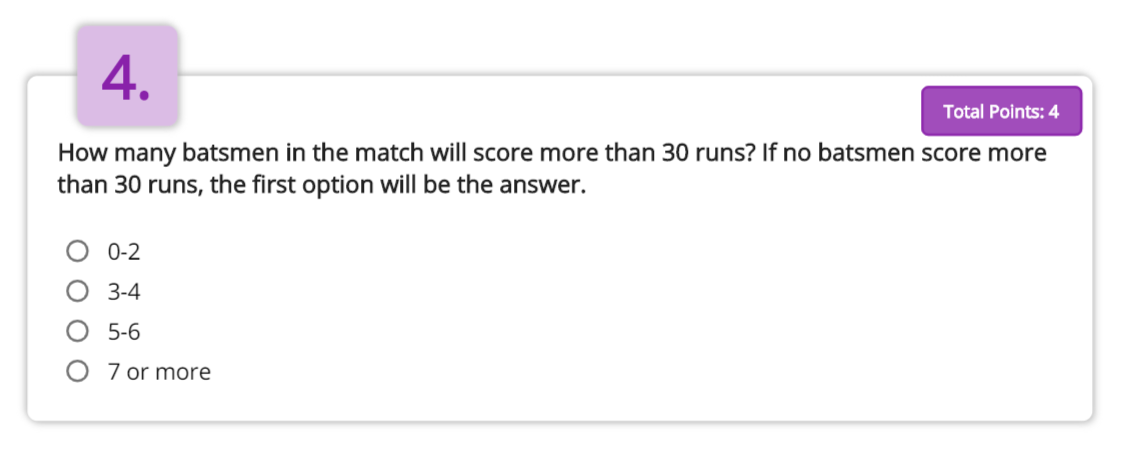

In [43]:
batsman_ = deliveries[(deliveries.batsman.isin(DC_batsmen)) | (deliveries.batsman.isin(MI_batsmen))]
batsman_score = batsman_.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index(name = "runs_scored")
DC_MI_batsman_score = batsman_.groupby(['match_id','batsman'])['batsman_runs'].count().reset_index(name = "balls_faced")
DC_MI_batsman_score["runs_scored"] = batsman_score.runs_scored
def batsman_record(data_batsmen):
    for i in data_batsmen.batsman.unique():
        batsman_name.append(i)
        balls_faced1.append(round((data_batsmen[data_batsmen.batsman == i].balls_faced.mean()),1))
        runs_scored1.append(round((data_batsmen[data_batsmen.batsman == i].runs_scored.mean()),1))
    DC_batsmen_overall =  pd.DataFrame(list(zip(batsman_name,  balls_faced1,  runs_scored1)), 
               columns =['batsman',  'balls_faced', 'runs_scored'])
    return DC_batsmen_overall

batsman_name=[];runs_scored1=[];balls_faced1=[]
DC_MI_batsmen_runs_overall = batsman_record(DC_MI_batsman_score)
DC_MI_batsmen_runs_overall

,batsman,balls_faced,runs_scored
0,S Dhawan,23.9,29.3
1,AM Rahane,24.4,29.2
2,HH Pandya,12.1,18.3
3,KA Pollard,14.9,21.1
4,KH Pandya,13.8,19.9
5,RG Sharma,21.0,27.0
6,AR Patel,10.6,13.0
7,RR Pant,20.4,33.2
8,SA Yadav,11.4,14.5
9,MP Stoinis,14.9,19.3


## Answer: 3-4 batsmen will score more than 30

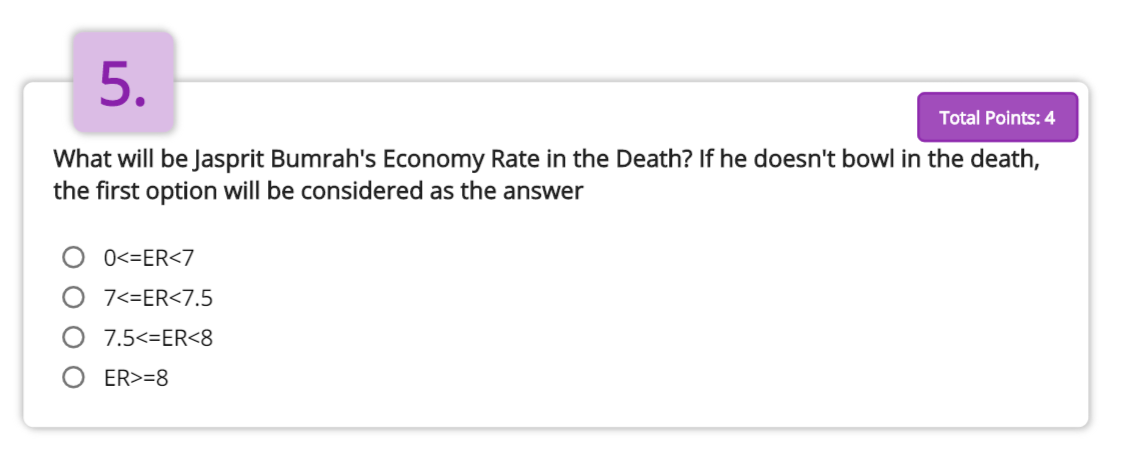

In [61]:
bumrah = deliveries[(deliveries.bowler == 'JJ Bumrah') & (deliveries.over >15)]
bumrah_er = bumrah.groupby(['match_id'])['batsman_runs'].count().reset_index(name = "balls_bowled")
bumrah_r = bumrah.groupby(['match_id'])['batsman_runs'].sum().reset_index(name = "runs_conceeded")
bumrah_er["runs_conceeded"] = bumrah_r.runs_conceeded
bumrah_er["economy_rate"] = (bumrah_er.runs_conceeded/bumrah_er.balls_bowled)*6


#histogram

bumrah_er[bumrah_er.economy_rate>=8].iplot(kind="hist",
              bins=80, colors=["blue"],
              keys=["economy_rate"],
              dimensions=(600, 400),
              title="Economy rate >=8 of Bumrah in deaths")

bumrah_er[(bumrah_er.economy_rate>=7.5) & (bumrah_er.economy_rate <8)].iplot(kind="hist",
              bins=80, colors=["blue"],
              keys=["economy_rate"],
              dimensions=(600, 400),
              title="Economy rate (7.5-8) of Bumrah in deaths")

bumrah_er[(bumrah_er.economy_rate>=7) & (bumrah_er.economy_rate <7.5)].iplot(kind="hist",
              bins=80, colors=["blue"],
              keys=["economy_rate"],
              dimensions=(600, 400),
              title="Economy rate (7-7.5) of Bumrah in deaths")

bumrah_er[(bumrah_er.economy_rate <7)].iplot(kind="hist",
              bins=80, colors=["blue"],
              keys=["economy_rate"],
              dimensions=(600, 400),
              title="Economy rate (0-7) of Bumrah in deaths")

In [55]:
bumrah_er.economy_rate.mode()

0    6.0
1    7.5
2    9.0
dtype: float64

In [63]:
## Head to Head
bumrah1 = deliveries[(deliveries.bowler == 'JJ Bumrah') & (deliveries.over >15) & (deliveries.batsman.isin(DC_batsmen))]
bumrah_er1 = bumrah1.groupby(['match_id'])['batsman_runs'].count().reset_index(name = "balls_bowled")
bumrah_r1 = bumrah1.groupby(['match_id'])['batsman_runs'].sum().reset_index(name = "runs_conceeded")
bumrah_er1["runs_conceeded"] = bumrah_r1.runs_conceeded
bumrah_er1["economy_rate"] = (bumrah_er1.runs_conceeded/bumrah_er1.balls_bowled)*6
bumrah_er1

,match_id,balls_bowled,runs_conceeded,economy_rate
0,22,6,2,2.000000
1,47,3,4,8.000000
2,50,2,2,6.000000
3,539,3,4,8.000000
4,597,1,0,0.000000
5,613,9,24,16.000000
6,7902,6,7,7.000000
7,7927,10,7,4.200000
8,7943,6,4,4.000000
9,11139,9,23,15.333333


## answer:>=8